In [1]:
%matplotlib inline
import math
from ipywidgets import interactive 
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#This is the Eij Tidal Tensor for phi-symmetry, t=0, and wavevector k=1.
def Func(r, theta):
    #Input conditions of problem
    Q = 1
    G = 1
    k = 1
    w = 1
    t = 0
    C = 4*G*Q*(k**2)
    Err = ((-C/r**3)*((3/((k*r)**2)-1)*np.cos(k*r-w*t)+3*np.sin(k*r-w*t)/(k*r)))*(3*np.cos(theta)**2-1)
    Ert = (-C/r**3)*((6/((k*r)**2)-3)*np.cos(k*r-w*t)-(k*r-6/(k*r))*np.sin(k*r-w*t))*(np.sin(theta)*np.cos(theta))
    Edif = (-C/(2*r**3))*((-3/((k*r)**2)+3-(k*r)**2)*np.cos(k*r-w*t)-(3/(k*r)-2*k*r)*np.sin(k*r-w*t))*(np.sin(theta)**2)
    Matrix = np.array([[Err, Ert], 
                       [Ert, (Edif-Err)/2]])
    return Matrix

In [3]:
#Use the x and z coordinates, create a grid, convert those into polar and get the matrix values at each point
#Defines the number of points in x and z direction
nx, nz = 100, 200 

#Represents the spacing we will use to place vectors
grid = 10
     
#Defines the grid for phi=0 plane. We will have to redo this with phi=pi plane and a different rotation matrix.
XMAX, ZMAX = 8, 8
x = np.linspace(0, XMAX, nx)
z = np.linspace(-ZMAX, ZMAX, nz)
X, Z = np.meshgrid(x, z)
r, theta = np.hypot(X,Z), np.arctan2(X,Z)
arrayr = ([X/r, Z/r], [-Z/r, X/r])
Matrix = Func(r, theta)
#after getting matrix values, swap axes for iteration 
MatrixSwap = np.swapaxes(np.swapaxes(Matrix,0,2),1,3)

#get value of rotation matrix for all values of theta in the grid
Rotation = [[np.sin(theta), np.cos(theta)],
            [np.cos(theta), -np.sin(theta)]]
RotationSwap = np.swapaxes(np.swapaxes(Rotation,0,2),1,3)

#Calculate the eigenvectors and eigenvalues of the matrix in polar coordinates.
eigval, eigvec = np.linalg.eig(MatrixSwap)

#Convert the eigenvectors from (Vr, Vtheta) -> (Vx, Vy)
cartMatrix = np.matmul(RotationSwap, eigvec)
#Separate into larger and smaller magnitude eigenvalues
large_eigval = np.amax(np.abs(eigval), axis=2)    
small_eigval = np.amin(np.abs(eigval), axis=2)

In [4]:
#Create a scaled version of the plot where the eigenvector corresponding to the larger eigenvalue is scaled to 1
#and the eigenvector corresponding to the smaller eigenvalue is scaled to 1*ratio of the eigenvalues. 
for i in range(0, nz):
    for j in range(0, nx):
        if abs(eigval[i,j,0]) > abs(eigval[i,j,1]):
            cartMatrix[i,j,0,0] = cartMatrix[i,j,0,0]
            cartMatrix[i,j,1,0] = cartMatrix[i,j,1,0]
            cartMatrix[i,j,0,1] = cartMatrix[i,j,0,1]*abs(eigval[i,j,1]/eigval[i,j,0])
            cartMatrix[i,j,1,1] = cartMatrix[i,j,1,1]*abs(eigval[i,j,1]/eigval[i,j,0])
        else:
            cartMatrix[i,j,0,1] = cartMatrix[i,j,0,1]
            cartMatrix[i,j,1,1] = cartMatrix[i,j,1,1]
            cartMatrix[i,j,0,0] = cartMatrix[i,j,0,0]*abs(eigval[i,j,0]/eigval[i,j,1])
            cartMatrix[i,j,1,0] = cartMatrix[i,j,1,0]*abs(eigval[i,j,0]/eigval[i,j,1])

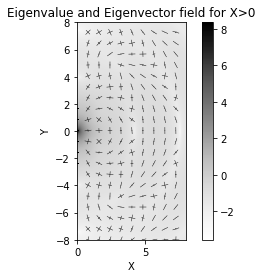

In [5]:
#Plotting the scaled eigenvectors overlayed on the plot of the larger eigenvalues.
fig, ax1 = plt.subplots()
ax1.quiver(X[::grid,::grid],Z[::grid,::grid],cartMatrix[::grid,::grid,0,0],cartMatrix[::grid,::grid,1,0], units="xy", pivot='mid', headlength=0, headwidth=1, scale=2)
ax1.quiver(X[::grid,::grid],Z[::grid,::grid],cartMatrix[::grid,::grid,0,1],cartMatrix[::grid,::grid,1,1], units="xy", pivot='mid', headlength=0, headwidth=1, scale=2)
z1 = large_eigval
ax1 = plt.imshow(np.log10(np.abs(z1)), interpolation='bilinear', cmap='Greys', extent=[0,XMAX,-ZMAX,ZMAX])
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Eigenvalue and Eigenvector field for X>0')
plt.show()